# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Perform Pre-processing

## 2016 Data

### Import Data

In [6]:
university_df_2016 = pd.read_csv("files/university_rankings_2016_raw.csv", thousands=",", na_values={"-"})
university_df_2016.head(10)

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0
1,2,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4
2,3,Stanford University,United States,15596,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3
3,4,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5
4,5,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0
5,6,Harvard University,United States,20152,8.9,25%,NaN,91.6,83.6,99.0,99.8,45.2,77.2
6,7,Princeton University,United States,7929,8.4,27%,45:55:00,90.1,85.1,91.9,99.3,52.1,78.5
7,8,Imperial College London,United Kingdom,15060,11.7,51%,37 : 63,89.1,83.3,88.5,96.7,53.7,96.0
8,9,ETH Zurich,Switzerland,18178,14.7,37%,31 : 69,88.3,77.0,95.0,91.1,80.0,97.9
9,10,The University of Chicago,United States,14221,6.9,20%,42:58:00,87.9,85.7,88.9,99.2,36.6,65.0


In [7]:
university_df_2016.tail(10)

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
790,601-800,University of West Bohemia,Czech Republic,15639,21.5,2%,52:48:00,NaN,16.3,9.7,29.8,32.1,23.1
791,601-800,University of the West of England,United Kingdom,22525,21.4,15%,53:47:00,NaN,16.9,11.2,34.6,28.5,48.5
792,601-800,West University of Timişoara,Romania,12933,19.0,2%,62:38:00,NaN,16.1,3.9,22.4,NaN,21.0
793,601-800,University of Westminster,United Kingdom,16610,20.9,43%,57:43:00,NaN,17.3,11.7,21.1,28.5,81.9
794,601-800,Xidian University,China,31618,16.4,2%,29 : 71,NaN,17.9,12.1,8.9,83.7,12.8
795,601-800,Yeungnam University,South Korea,21958,15.3,3%,48:52:00,NaN,18.6,10.9,26.5,35.4,24.3
796,601-800,Yıldız Technical University,Turkey,31268,28.7,2%,36 : 64,NaN,14.5,7.6,19.3,44.0,14.9
797,601-800,Yokohama City University,Japan,4122,3.7,3%,NaN,NaN,24.0,10.2,36.4,37.9,16.1
798,601-800,Yokohama National University,Japan,10117,12.1,7%,28 : 72,NaN,20.1,16.0,13.5,40.4,23.3
799,601-800,Yuan Ze University,Taiwan,8663,20.6,4%,43:57:00,NaN,16.2,18.3,28.6,39.8,17.7


In [8]:
university_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     800 non-null    object 
 1   Name                     800 non-null    object 
 2   Country                  800 non-null    object 
 3   Student Population       800 non-null    int64  
 4   Students to Staff Ratio  800 non-null    float64
 5   International Students   800 non-null    object 
 6   Female to Male Ratio     748 non-null    object 
 7   Overall Score            200 non-null    float64
 8   Teaching                 800 non-null    float64
 9   Research Environment     800 non-null    float64
 10  Research Quality         800 non-null    float64
 11  Industry Impact          763 non-null    float64
 12  International Outlook    800 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 81.4+ KB


### Analyze Missing Data

<Axes: >

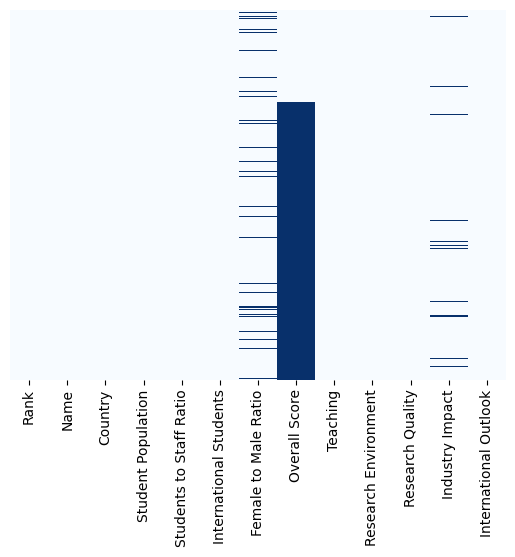

In [10]:
# View missing data
sns.heatmap(university_df_2016.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [11]:
university_df_2016.isnull().sum()

Rank                         0
Name                         0
Country                      0
Student Population           0
Students to Staff Ratio      0
International Students       0
Female to Male Ratio        52
Overall Score              600
Teaching                     0
Research Environment         0
Research Quality             0
Industry Impact             37
International Outlook        0
dtype: int64

### Impute Missing Industry Impact Values Through K-Means Clustering

<Axes: >

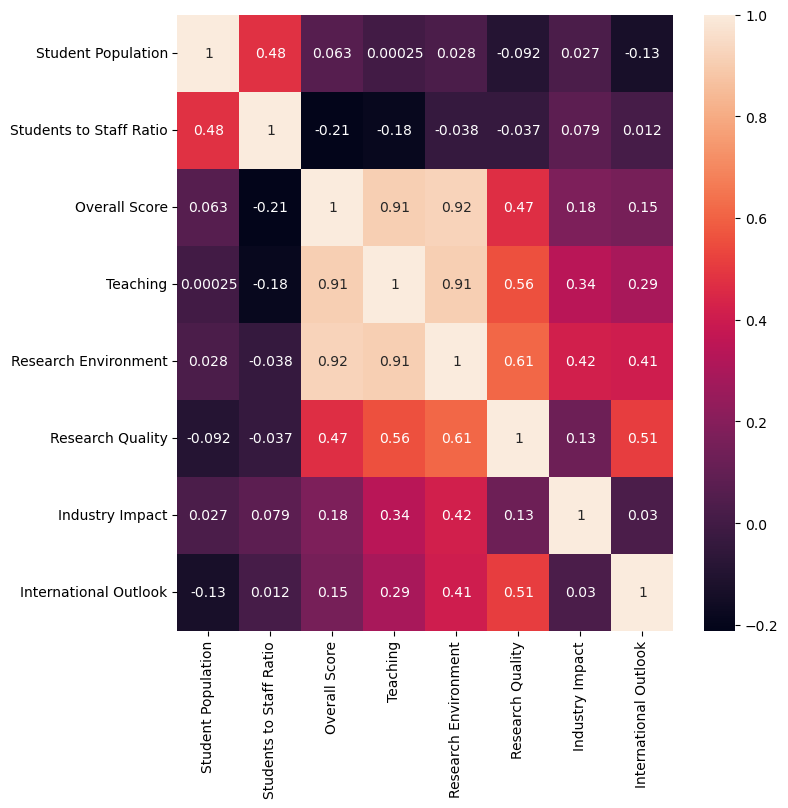

In [13]:
# Show the correlation between features

plt.figure(figsize=(8, 8))
correlations = university_df_2016.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

In [14]:
# Select columns to be used

numeric_df = university_df_2016[[
    "Student Population",
    "Students to Staff Ratio",
    "Teaching",
    "Research Environment",
    "Research Quality",
    "International Outlook"
]]

numeric_df

,Student Population,Students to Staff Ratio,Teaching,Research Environment,Research Quality,International Outlook
0,2243,6.9,95.6,97.6,99.8,64.0
1,19920,11.6,86.5,98.9,98.8,94.4
2,15596,7.8,92.5,96.2,99.9,76.3
3,18810,11.8,88.2,96.7,97.0,91.5
4,11074,9.0,89.4,88.6,99.7,84.0
...,...,...,...,...,...,...
795,21958,15.3,18.6,10.9,26.5,24.3
796,31268,28.7,14.5,7.6,19.3,14.9
797,4122,3.7,24.0,10.2,36.4,16.1
798,10117,12.1,20.1,16.0,13.5,23.3


In [15]:
# Scale the data

scaler = StandardScaler()
numeric_df = scaler.fit_transform(numeric_df)
numeric_df

array([[-0.97102297, -0.97600084,  4.25899263,  3.54484989,  1.79403943,
         0.65462112],
       [-0.18468594, -0.59965347,  3.65303721,  3.61129901,  1.75704149,
         1.93858532],
       [-0.37703313, -0.90393432,  4.05256825,  3.47328929,  1.79773922,
         1.1741198 ],
       ...,
       [-0.88743824, -1.23223734, -0.50874452, -0.9225758 , -0.55163006,
        -1.36846721],
       [-0.62075891, -0.55961652, -0.7684397 , -0.62611048, -1.39888291,
        -1.06437042],
       [-0.6854381 ,  0.12101169, -1.02813488, -0.50854664, -0.840214  ,
        -1.30089014]])

In [16]:
numeric_df.shape

(800, 6)

Text(0, 0.5, 'Inertia')

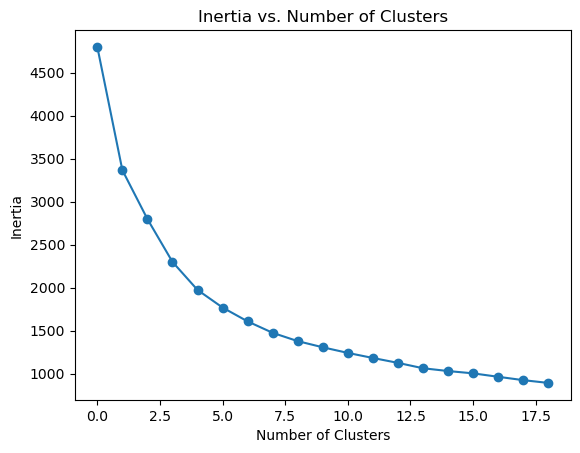

In [17]:
# Select the optimal number of clusters

inertia = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit_transform(numeric_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(inertia, 'o-')
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

In [18]:
# Apply k-means clustering

n_clusters = 7

kmeans = KMeans(n_clusters, n_init=10, random_state=2023)
kmeans.fit_transform(numeric_df)
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 3, 4, 3, 4, 0, 4, 4, 4, 4, 2, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 0, 3, 4, 3, 3, 2, 2, 2, 4, 4, 4,
       4, 2, 2, 3, 3, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 3, 2, 2, 2,
       3, 2, 3, 4, 2, 4, 2, 2, 1, 2, 4, 2, 4, 4, 3, 1, 3, 3, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 4,
       4, 3, 2, 1, 3, 2, 4, 1, 1, 2, 1, 2, 2, 2, 2,

In [19]:
labels.shape

(800,)

In [20]:
# Add 'Cluster' column to the original dataframe

university_df_2016["Cluster"] = labels
university_df_2016.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Cluster
0,1,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,0
1,2,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,0
2,3,Stanford University,United States,15596,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,0
3,4,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,0
4,5,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,0


In [21]:
# Impute missing values

missing_index = university_df_2016.loc[university_df_2016["Industry Impact"].isnull()].index

for index in missing_index:
    cluster = university_df_2016["Cluster"].iloc[index]
    mean = university_df_2016["Industry Impact"].loc[university_df_2016["Cluster"] == cluster].mean()
    university_df_2016.loc[index, ["Industry Impact"]] = mean
    
university_df_2016["Industry Impact"].isnull().sum()

0

### Calculate Missing Overall Scores

In [23]:
# Use the published formula:
# Overall Score = 0.3(Teaching) + 0.3(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.025(Industry Impact)

overall_score = (0.3*university_df_2016["Teaching"] + 0.3*university_df_2016["Research Environment"] +
                 0.3*university_df_2016["Research Quality"] + 0.075*university_df_2016["International Outlook"] +
                 0.025*university_df_2016["Industry Impact"]
                )
overall_score

0      95.1450
1      94.1675
2      93.8850
3      92.8075
4      91.9950
        ...   
795    19.5075
796    14.6375
797    23.3350
798    17.6375
799    21.2525
Length: 800, dtype: float64

In [24]:
missing_OS_index = university_df_2016.loc[university_df_2016["Overall Score"].isnull()].index

for index in missing_OS_index:
    university_df_2016.loc[index, ["Overall Score"]] = overall_score[index]
    
university_df_2016.isnull().sum()

Rank                        0
Name                        0
Country                     0
Student Population          0
Students to Staff Ratio     0
International Students      0
Female to Male Ratio       52
Overall Score               0
Teaching                    0
Research Environment        0
Research Quality            0
Industry Impact             0
International Outlook       0
Cluster                     0
dtype: int64

### Compute University Rankings

In [26]:
university_df_2016["Rank"] = university_df_2016["Overall Score"].rank(method='min', ascending=False)
university_df_2016.tail(10)

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Cluster
790,709.0,University of West Bohemia,Czech Republic,15639,21.5,2%,52:48:00,19.275000,16.3,9.7,29.8,32.100000,23.1,5
791,625.0,University of the West of England,United Kingdom,22525,21.4,15%,53:47:00,23.160000,16.9,11.2,34.6,28.500000,48.5,1
792,770.0,West University of Timişoara,Romania,12933,19.0,2%,62:38:00,15.398019,16.1,3.9,22.4,44.120779,21.0,5
793,646.0,University of Westminster,United Kingdom,16610,20.9,43%,57:43:00,21.885000,17.3,11.7,21.1,28.500000,81.9,1
794,783.0,Xidian University,China,31618,16.4,2%,29 : 71,14.722500,17.9,12.1,8.9,83.700000,12.8,5
795,705.0,Yeungnam University,South Korea,21958,15.3,3%,48:52:00,19.507500,18.6,10.9,26.5,35.400000,24.3,5
796,785.0,Yıldız Technical University,Turkey,31268,28.7,2%,36 : 64,14.637500,14.5,7.6,19.3,44.000000,14.9,5
797,620.0,Yokohama City University,Japan,4122,3.7,3%,NaN,23.335000,24.0,10.2,36.4,37.900000,16.1,5
798,740.0,Yokohama National University,Japan,10117,12.1,7%,28 : 72,17.637500,20.1,16.0,13.5,40.400000,23.3,5
799,657.0,Yuan Ze University,Taiwan,8663,20.6,4%,43:57:00,21.252500,16.2,18.3,28.6,39.800000,17.7,5


### Sort Universities According to Ranking

In [28]:
university_df_2016 = university_df_2016.sort_values(by=["Rank"], ignore_index=True)
university_df_2016

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Cluster
0,1.0,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2000,95.6,97.6,99.8,97.8,64.0,0
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2000,86.5,98.9,98.8,73.1,94.4,0
2,3.0,Stanford University,United States,15596,7.8,22%,42:58:00,93.9000,92.5,96.2,99.9,63.3,76.3,0
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8000,88.2,96.7,97.0,55.0,91.5,0
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0000,89.4,88.6,99.7,95.4,84.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796.0,Universiti Teknologi MARA,Malaysia,69268,16.8,0%,65:35:00,14.1475,15.2,7.7,18.2,28.3,14.8,5
796,797.0,University of Pardubice,Czech Republic,10671,19.8,4%,55:45:00,14.1325,15.9,11.9,11.1,28.3,23.4,5
797,798.0,Southern Federal University,Russian Federation,27556,9.0,3%,56:44:00,14.0750,21.9,8.2,9.2,39.5,17.3,5
798,799.0,National University of Córdoba,Argentina,108373,38.1,2%,62:38:00,14.0725,16.0,9.0,12.5,28.6,28.1,3


In [29]:
# Drop Cluster column
university_df_2016.drop(columns=["Cluster"], inplace=True)
university_df_2016.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
795,796.0,Universiti Teknologi MARA,Malaysia,69268,16.8,0%,65:35:00,14.1475,15.2,7.7,18.2,28.3,14.8
796,797.0,University of Pardubice,Czech Republic,10671,19.8,4%,55:45:00,14.1325,15.9,11.9,11.1,28.3,23.4
797,798.0,Southern Federal University,Russian Federation,27556,9.0,3%,56:44:00,14.0750,21.9,8.2,9.2,39.5,17.3
798,799.0,National University of Córdoba,Argentina,108373,38.1,2%,62:38:00,14.0725,16.0,9.0,12.5,28.6,28.1
799,800.0,V.N. Karazin Kharkiv National University,Ukraine,14410,9.7,22%,53:47:00,14.0400,21.7,8.9,1.7,28.8,48.4


## 2017 Data

### Import Data

In [32]:
university_df_2017 = pd.read_csv("files/university_rankings_2017_raw.csv", thousands=",")
university_df_2017

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,University of Oxford,United Kingdom,19720,10.9,35%,46:54:00,95,89.6,99.1,99.2,62.5,94.5
1,2,California Institute of Technology,United States,2181,6.7,27%,31 : 69,94.3,95.5,95.7,99.8,90.8,63.4
2,3,Stanford University,United States,15658,7.7,22%,42:58:00,93.8,92.6,95.9,99.9,60.9,76.5
3,4,University of Cambridge,United Kingdom,18605,11.3,35%,45:55:00,93.6,90.6,97.2,96.8,50.4,92.4
4,5,Massachusetts Institute of Technology,United States,11192,8.8,33%,37 : 63,93.4,90.3,92.3,99.9,88.4,85.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,801+,Universidad Autónoma de Yucatán,Mexico,15271,11.3,0%,51:49:00,8.3—18.5,19.0,6.9,12.0,32.9,27.5
977,801+,Yıldız Technical University,Turkey,34417,28.3,4%,37 : 63,8.3—18.5,13.6,8.1,22.5,44.7,18.5
978,801+,University of Zagreb,Croatia,67332,18.4,1%,58:42:00,8.3—18.5,20.4,11.6,17.1,44.6,25.4
979,801+,University of Zanjan,Iran,9444,24.0,0%,55:45:00,8.3—18.5,12.5,8.5,7.7,34.3,15.3


In [33]:
university_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     981 non-null    object 
 1   Name                     981 non-null    object 
 2   Country                  981 non-null    object 
 3   Student Population       981 non-null    int64  
 4   Students to Staff Ratio  981 non-null    float64
 5   International Students   981 non-null    object 
 6   Female to Male Ratio     926 non-null    object 
 7   Overall Score            981 non-null    object 
 8   Teaching                 981 non-null    float64
 9   Research Environment     981 non-null    float64
 10  Research Quality         981 non-null    float64
 11  Industry Impact          981 non-null    float64
 12  International Outlook    981 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 99.8+ KB


### Calculate Overall Scores

In [35]:
# Use the published formula:
# Overall Score = 0.3(Teaching) + 0.3(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.025(Industry Impact)

overall_score = (0.3*university_df_2017["Teaching"] + 0.3*university_df_2017["Research Environment"] +
                 0.3*university_df_2017["Research Quality"] + 0.075*university_df_2017["International Outlook"] +
                 0.025*university_df_2017["Industry Impact"]
                )
overall_score

0      95.020
1      94.325
2      93.780
3      93.570
4      93.380
        ...  
976    14.255
977    15.765
978    17.750
979    10.615
980    13.910
Length: 981, dtype: float64

In [36]:
university_df_2017["Overall Score"] = overall_score
university_df_2017.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
976,801+,Universidad Autónoma de Yucatán,Mexico,15271,11.3,0%,51:49:00,14.255,19.0,6.9,12.0,32.9,27.5
977,801+,Yıldız Technical University,Turkey,34417,28.3,4%,37 : 63,15.765,13.6,8.1,22.5,44.7,18.5
978,801+,University of Zagreb,Croatia,67332,18.4,1%,58:42:00,17.750,20.4,11.6,17.1,44.6,25.4
979,801+,University of Zanjan,Iran,9444,24.0,0%,55:45:00,10.615,12.5,8.5,7.7,34.3,15.3
980,801+,University of Łódź,Poland,36400,16.4,2%,66:34:00,13.910,15.9,8.3,14.1,32.3,21.5


### Compute University Rankings and Perform Sorting

In [38]:
university_df_2017["Rank"] = university_df_2017["Overall Score"].rank(method='min', ascending=False)
university_df_2017 = university_df_2017.sort_values(by=["Rank"], ignore_index=True)
university_df_2017

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,University of Oxford,United Kingdom,19720,10.9,35%,46:54:00,95.0200,89.6,99.1,99.2,62.5,94.5
1,2.0,California Institute of Technology,United States,2181,6.7,27%,31 : 69,94.3250,95.5,95.7,99.8,90.8,63.4
2,3.0,Stanford University,United States,15658,7.7,22%,42:58:00,93.7800,92.6,95.9,99.9,60.9,76.5
3,4.0,University of Cambridge,United Kingdom,18605,11.3,35%,45:55:00,93.5700,90.6,97.2,96.8,50.4,92.4
4,5.0,Massachusetts Institute of Technology,United States,11192,8.8,33%,37 : 63,93.3800,90.3,92.3,99.9,88.4,85.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,977.0,University of Zanjan,Iran,9444,24.0,0%,55:45:00,10.6150,12.5,8.5,7.7,34.3,15.3
977,978.0,Lviv Polytechnic National University,Ukraine,28037,13.5,1%,NaN,10.2450,16.6,7.6,1.0,32.4,25.0
978,979.0,University of Guadalajara,Mexico,109375,51.0,1%,51:49:00,10.1100,14.9,3.1,6.1,32.1,27.7
979,980.0,Sathyabama Institute of Science and Technology,India,15918,20.1,1%,45:55:00,9.6600,14.8,7.9,3.7,32.4,12.4


## 2018 Data

### Import Data

In [41]:
university_df_2018 = pd.read_csv("files/university_rankings_2018_raw.csv", thousands=",")
university_df_2018

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,University of Oxford,United Kingdom,20410,11.2,38%,46:54:00,94.3,86.7,99.5,99.1,63.7,95.0
1,2,University of Cambridge,United Kingdom,18390,10.9,35%,45:55:00,93.2,87.8,97.8,97.5,51.5,93.0
2,3,California Institute of Technology,United States,2209,6.5,27%,31 : 69,93,90.3,97.5,99.5,92.6,59.7
3,3,Stanford University,United States,15845,7.5,22%,42:58:00,93,89.1,96.7,99.9,60.5,77.6
4,5,Massachusetts Institute of Technology,United States,11177,8.7,34%,37 : 63,92.5,87.3,91.9,100.0,88.4,87.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1001+,Volgograd State Technical University,Russian Federation,9254,12.0,6%,NaN,9.2–15.5,17.7,6.9,2.0,41.5,17.7
1099,1001+,Voronezh State University,Russian Federation,15468,10.1,9%,58:42:00,9.2–15.5,20.8,7.1,1.9,33.2,24.4
1100,1001+,Yazd University,Iran,13600,23.9,0%,56:44:00,9.2–15.5,14.6,9.9,14.8,0.4,15.5
1101,1001+,Yeditepe University,Turkey,23260,25.1,1%,52:48:00,9.2–15.5,15.4,8.0,9.7,0.2,23.4


In [42]:
university_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     1103 non-null   object 
 1   Name                     1103 non-null   object 
 2   Country                  1103 non-null   object 
 3   Student Population       1103 non-null   int64  
 4   Students to Staff Ratio  1103 non-null   float64
 5   International Students   1103 non-null   object 
 6   Female to Male Ratio     1047 non-null   object 
 7   Overall Score            1103 non-null   object 
 8   Teaching                 1103 non-null   float64
 9   Research Environment     1103 non-null   float64
 10  Research Quality         1103 non-null   float64
 11  Industry Impact          1103 non-null   float64
 12  International Outlook    1103 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 112.2+ KB


### Calculate Overall Scores

In [44]:
# Use the published formula:
# Overall Score = 0.3(Teaching) + 0.3(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.025(Industry Impact)

overall_score = (0.3*university_df_2018["Teaching"] + 0.3*university_df_2018["Research Environment"] +
                 0.3*university_df_2018["Research Quality"] + 0.075*university_df_2018["International Outlook"] +
                 0.025*university_df_2018["Industry Impact"]
                )
overall_score

0       94.3075
1       93.1925
2       92.9825
3       93.0425
4       92.5400
         ...   
1098    10.3450
1099    11.6000
1100    12.9625
1101    11.6900
1102    14.6450
Length: 1103, dtype: float64

In [45]:
university_df_2018["Overall Score"] = overall_score
university_df_2018.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1098,1001+,Volgograd State Technical University,Russian Federation,9254,12.0,6%,NaN,10.3450,17.7,6.9,2.0,41.5,17.7
1099,1001+,Voronezh State University,Russian Federation,15468,10.1,9%,58:42:00,11.6000,20.8,7.1,1.9,33.2,24.4
1100,1001+,Yazd University,Iran,13600,23.9,0%,56:44:00,12.9625,14.6,9.9,14.8,0.4,15.5
1101,1001+,Yeditepe University,Turkey,23260,25.1,1%,52:48:00,11.6900,15.4,8.0,9.7,0.2,23.4
1102,1001+,University of Zanjan,Iran,10305,25.8,0%,55:45:00,14.6450,16.2,9.4,15.7,38.3,17.3


### Compute University Rankings and Perform Sorting

In [47]:
university_df_2018["Rank"] = university_df_2018["Overall Score"].rank(method='min', ascending=False)
university_df_2018 = university_df_2018.sort_values(by=["Rank"], ignore_index=True)
university_df_2018

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,University of Oxford,United Kingdom,20410,11.2,38%,46:54:00,94.3075,86.7,99.5,99.1,63.7,95.0
1,2.0,University of Cambridge,United Kingdom,18390,10.9,35%,45:55:00,93.1925,87.8,97.8,97.5,51.5,93.0
2,3.0,Stanford University,United States,15845,7.5,22%,42:58:00,93.0425,89.1,96.7,99.9,60.5,77.6
3,4.0,California Institute of Technology,United States,2209,6.5,27%,31 : 69,92.9825,90.3,97.5,99.5,92.6,59.7
4,5.0,Massachusetts Institute of Technology,United States,11177,8.7,34%,37 : 63,92.5400,87.3,91.9,100.0,88.4,87.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1099.0,Ondokuz Mayis University,Turkey,42911,18.8,4%,56:44:00,10.5800,16.7,7.3,4.3,33.2,16.8
1099,1100.0,Universidad Autónoma del Estado de Hidalgo,Mexico,32210,17.7,0%,57:43:00,10.5350,17.0,7.0,3.0,33.8,21.2
1100,1101.0,Volgograd State Technical University,Russian Federation,9254,12.0,6%,NaN,10.3450,17.7,6.9,2.0,41.5,17.7
1101,1102.0,Sathyabama Institute of Science and Technology,India,17861,22.1,1%,51:49:00,9.9025,17.0,7.9,2.1,32.2,13.3


## 2019 Data

### Import Data

In [50]:
university_df_2019 = pd.read_csv("files/university_rankings_2019_raw.csv", thousands=",")
university_df_2019

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,University of Oxford,United Kingdom,20300,11.0,40%,46:54:00,96,91.8,99.5,99.1,67.0,96.3
1,2,University of Cambridge,United Kingdom,18750,10.9,37%,46:54:00,94.8,92.1,98.8,97.1,52.9,94.3
2,3,Stanford University,United States,15878,7.4,23%,43:57:00,94.7,93.6,96.8,99.9,64.6,79.3
3,4,Massachusetts Institute of Technology,United States,11231,8.7,34%,38 : 62,94.2,91.9,92.7,99.9,87.6,89.0
4,5,California Institute of Technology,United States,2255,6.5,29%,33 : 67,94.1,94.5,97.2,99.2,88.2,62.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1001+,Yazd University,Iran,13635,30.3,0%,57:43:00,9.8–18.9,13.6,11.1,15.8,35.5,15.8
1254,1001+,Yeditepe University,Turkey,19705,18.6,2%,55:45:00,9.8–18.9,14.6,9.8,10.1,49.7,22.1
1255,1001+,Yuan Ze University,Taiwan,8186,19.2,9%,42:58:00,9.8–18.9,16.3,14.3,16.5,49.2,27.4
1256,1001+,Zagazig University,Egypt,135036,20.6,2%,51:49:00,9.8–18.9,12.9,7.2,18.7,34.0,38.4


In [51]:
university_df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     1258 non-null   object 
 1   Name                     1258 non-null   object 
 2   Country                  1258 non-null   object 
 3   Student Population       1258 non-null   int64  
 4   Students to Staff Ratio  1258 non-null   float64
 5   International Students   1258 non-null   object 
 6   Female to Male Ratio     1202 non-null   object 
 7   Overall Score            1258 non-null   object 
 8   Teaching                 1258 non-null   float64
 9   Research Environment     1258 non-null   float64
 10  Research Quality         1258 non-null   float64
 11  Industry Impact          1258 non-null   float64
 12  International Outlook    1258 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 127.9+ KB


### Calculate Overall Scores

In [53]:
# Use the published formula:
# Overall Score = 0.3(Teaching) + 0.3(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.025(Industry Impact)

overall_score = (0.3*university_df_2019["Teaching"] + 0.3*university_df_2019["Research Environment"] +
                 0.3*university_df_2019["Research Quality"] + 0.075*university_df_2019["International Outlook"] +
                 0.025*university_df_2019["Industry Impact"]
                )
overall_score

0       96.0175
1       94.7950
2       94.6525
3       94.2150
4       94.1475
         ...   
1253    14.2225
1254    13.2500
1255    17.4150
1256    15.3700
1257    17.5075
Length: 1258, dtype: float64

In [54]:
university_df_2019["Overall Score"] = overall_score
university_df_2019.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1253,1001+,Yazd University,Iran,13635,30.3,0%,57:43:00,14.2225,13.6,11.1,15.8,35.5,15.8
1254,1001+,Yeditepe University,Turkey,19705,18.6,2%,55:45:00,13.2500,14.6,9.8,10.1,49.7,22.1
1255,1001+,Yuan Ze University,Taiwan,8186,19.2,9%,42:58:00,17.4150,16.3,14.3,16.5,49.2,27.4
1256,1001+,Zagazig University,Egypt,135036,20.6,2%,51:49:00,15.3700,12.9,7.2,18.7,34.0,38.4
1257,1001+,University of Zanjan,Iran,10606,26.7,0%,55:45:00,17.5075,17.8,10.6,22.2,39.7,17.8


### Compute University Rankings and Perform Sorting

In [56]:
university_df_2019["Rank"] = university_df_2019["Overall Score"].rank(method='min', ascending=False)
university_df_2019 = university_df_2019.sort_values(by=["Rank"], ignore_index=True)
university_df_2019

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,University of Oxford,United Kingdom,20300,11.0,40%,46:54:00,96.0175,91.8,99.5,99.1,67.0,96.3
1,2.0,University of Cambridge,United Kingdom,18750,10.9,37%,46:54:00,94.7950,92.1,98.8,97.1,52.9,94.3
2,3.0,Stanford University,United States,15878,7.4,23%,43:57:00,94.6525,93.6,96.8,99.9,64.6,79.3
3,4.0,Massachusetts Institute of Technology,United States,11231,8.7,34%,38 : 62,94.2150,91.9,92.7,99.9,87.6,89.0
4,5.0,California Institute of Technology,United States,2255,6.5,29%,33 : 67,94.1475,94.5,97.2,99.2,88.2,62.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1254.0,Chiba Institute of Technology,Japan,9774,30.7,1%,0.561111111,10.7200,13.6,8.8,6.3,36.4,16.0
1254,1255.0,Ondokuz Mayis University,Turkey,33790,30.5,6%,52:48:00,10.6500,14.1,8.3,4.9,37.5,20.3
1255,1255.0,Mahasarakham University,Thailand,43552,34.4,0%,63:37:00,10.6500,13.3,7.1,6.3,34.8,23.6
1256,1257.0,Sathyabama Institute of Science and Technology,India,15886,19.5,1%,48:52:00,10.2975,15.9,8.4,3.4,34.5,15.0


## 2020 Data

### Import Data

In [59]:
university_df_2020 = pd.read_csv("files/university_rankings_2020_raw.csv", thousands=",")
university_df_2020

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,University of Oxford,United Kingdom,20665,11.2,41%,46:54:00,95.4,90.5,99.6,98.4,65.5,96.4
1,2,California Institute of Technology,United States,2240,6.4,30%,34 : 66,94.5,92.1,97.2,97.9,88.0,82.5
2,3,University of Cambridge,United Kingdom,18980,10.9,37%,47:53:00,94.4,91.4,98.7,95.8,59.3,95.0
3,4,Stanford University,United States,16135,7.3,23%,43:57:00,94.3,92.8,96.4,99.9,66.2,79.5
4,5,Massachusetts Institute of Technology,United States,11247,8.6,34%,39 : 61,93.6,90.5,92.4,99.5,86.9,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,1001+,Yuan Ze University,Taiwan,8356,19.5,8%,42:58:00,10.7–22.1,17.3,13.9,15.5,47.0,28.3
1393,1001+,Zagazig University,Egypt,156419,24.0,1%,53:47:00,10.7–22.1,13.6,7.7,29.6,34.4,38.8
1394,1001+,University of Zagreb,Croatia,68216,18.9,3%,59:41:00,10.7–22.1,17.8,12.9,25.3,37.4,33.0
1395,1001+,University of Zanjan,Iran,9980,25.1,0%,54:46:00,10.7–22.1,17.0,12.3,28.5,43.8,18.7


In [60]:
university_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     1397 non-null   object 
 1   Name                     1397 non-null   object 
 2   Country                  1397 non-null   object 
 3   Student Population       1397 non-null   int64  
 4   Students to Staff Ratio  1397 non-null   float64
 5   International Students   1397 non-null   object 
 6   Female to Male Ratio     1331 non-null   object 
 7   Overall Score            1397 non-null   object 
 8   Teaching                 1397 non-null   float64
 9   Research Environment     1397 non-null   float64
 10  Research Quality         1397 non-null   float64
 11  Industry Impact          1397 non-null   float64
 12  International Outlook    1397 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 142.0+ KB


### Calculate Overall Scores

In [62]:
# Use the published formula:
# Overall Score = 0.3(Teaching) + 0.3(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.025(Industry Impact)

overall_score = (0.3*university_df_2020["Teaching"] + 0.3*university_df_2020["Research Environment"] +
                 0.3*university_df_2020["Research Quality"] + 0.075*university_df_2020["International Outlook"] +
                 0.025*university_df_2020["Industry Impact"]
                )
overall_score

0       95.4175
1       94.5475
2       94.3775
3       94.3475
4       93.5675
         ...   
1392    17.3075
1393    19.0400
1394    20.2100
1395    19.8375
1396    22.0750
Length: 1397, dtype: float64

In [63]:
university_df_2020["Overall Score"] = overall_score
university_df_2020.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1392,1001+,Yuan Ze University,Taiwan,8356,19.5,8%,42:58:00,17.3075,17.3,13.9,15.5,47.0,28.3
1393,1001+,Zagazig University,Egypt,156419,24.0,1%,53:47:00,19.0400,13.6,7.7,29.6,34.4,38.8
1394,1001+,University of Zagreb,Croatia,68216,18.9,3%,59:41:00,20.2100,17.8,12.9,25.3,37.4,33.0
1395,1001+,University of Zanjan,Iran,9980,25.1,0%,54:46:00,19.8375,17.0,12.3,28.5,43.8,18.7
1396,1001+,Zhejiang University of Technology,China,31228,14.7,8%,NaN,22.0750,16.7,14.2,32.3,51.4,24.4


### Compute University Rankings and Perform Sorting

In [65]:
university_df_2020["Rank"] = university_df_2020["Overall Score"].rank(method='min', ascending=False)
university_df_2020 = university_df_2020.sort_values(by=["Rank"], ignore_index=True)
university_df_2020

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,University of Oxford,United Kingdom,20665,11.2,41%,46:54:00,95.4175,90.5,99.6,98.4,65.5,96.4
1,2.0,California Institute of Technology,United States,2240,6.4,30%,34 : 66,94.5475,92.1,97.2,97.9,88.0,82.5
2,3.0,University of Cambridge,United Kingdom,18980,10.9,37%,47:53:00,94.3775,91.4,98.7,95.8,59.3,95.0
3,4.0,Stanford University,United States,16135,7.3,23%,43:57:00,94.3475,92.8,96.4,99.9,66.2,79.5
4,5.0,Massachusetts Institute of Technology,United States,11247,8.6,34%,39 : 61,93.5675,90.5,92.4,99.5,86.9,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,1393.0,Ceará State University,Brazil,20174,17.8,0%,55:45:00,11.2925,16.2,8.3,6.1,35.6,16.3
1393,1394.0,Pontifical Catholic University of Minas Gerais,Brazil,34101,21.3,0%,57:43:00,11.2425,15.3,7.7,6.7,35.1,19.4
1394,1395.0,Bashkir State University,Russian Federation,15236,11.1,3%,63:37:00,11.0550,17.0,8.1,4.5,36.9,16.7
1395,1396.0,University of Caxias do Sul,Brazil,17101,24.9,0%,54:46:00,10.9625,13.8,7.8,7.6,35.0,17.7


## 2021 Data

### Import Data

In [68]:
university_df_2021 = pd.read_csv("files/university_rankings_2021_raw.csv", thousands=",")
university_df_2021

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,University of Oxford,United Kingdom,20775,11.1,41%,46:54:00,95.6,91.3,99.6,98.0,68.7,96.4
1,2,Stanford University,United States,16223,7.4,23%,44:56:00,94.9,92.2,96.7,99.9,90.1,79.5
2,3,Harvard University,United States,21261,9.3,25%,49:51:00,94.8,94.4,98.8,99.4,46.8,77.7
3,4,California Institute of Technology,United States,2238,6.3,33%,36 : 64,94.5,92.5,96.9,97.0,92.7,83.6
4,5,Massachusetts Institute of Technology,United States,11276,8.4,34%,39 : 61,94.4,90.7,94.4,99.7,90.4,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,1001+,Yuan Ze University,Taiwan,8188,19.7,7%,42:58:00,10.3–25.0,18.8,14.1,19.7,50.1,30.9
1522,1001+,Yuriy Fedkovych Chernivtsi National University,Ukraine,12616,10.7,0%,57:43:00,10.3–25.0,17.9,7.7,5.3,33.4,22.2
1523,1001+,Zagazig University,Egypt,156270,24.4,2%,54:46:00,10.3–25.0,13.7,7.4,42.3,33.4,40.6
1524,1001+,University of Zagreb,Croatia,59336,15.3,3%,59:41:00,10.3–25.0,19.5,13.2,27.2,40.3,34.3


In [69]:
university_df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     1526 non-null   object 
 1   Name                     1526 non-null   object 
 2   Country                  1526 non-null   object 
 3   Student Population       1526 non-null   int64  
 4   Students to Staff Ratio  1526 non-null   float64
 5   International Students   1526 non-null   object 
 6   Female to Male Ratio     1453 non-null   object 
 7   Overall Score            1526 non-null   object 
 8   Teaching                 1526 non-null   float64
 9   Research Environment     1526 non-null   float64
 10  Research Quality         1526 non-null   float64
 11  Industry Impact          1526 non-null   float64
 12  International Outlook    1526 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 155.1+ KB


### Calculate Overall Scores

In [71]:
# Use the published formula:
# Overall Score = 0.3(Teaching) + 0.3(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.025(Industry Impact)

overall_score = (0.3*university_df_2021["Teaching"] + 0.3*university_df_2021["Research Environment"] +
                 0.3*university_df_2021["Research Quality"] + 0.075*university_df_2021["International Outlook"] +
                 0.025*university_df_2021["Industry Impact"]
                )
overall_score

0       95.6175
1       94.8550
2       94.7775
3       94.5075
4       94.4500
         ...   
1521    19.3500
1522    11.7700
1523    22.9000
1524    21.5500
1525    21.4275
Length: 1526, dtype: float64

In [72]:
university_df_2021["Overall Score"] = overall_score
university_df_2021.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1521,1001+,Yuan Ze University,Taiwan,8188,19.7,7%,42:58:00,19.3500,18.8,14.1,19.7,50.1,30.9
1522,1001+,Yuriy Fedkovych Chernivtsi National University,Ukraine,12616,10.7,0%,57:43:00,11.7700,17.9,7.7,5.3,33.4,22.2
1523,1001+,Zagazig University,Egypt,156270,24.4,2%,54:46:00,22.9000,13.7,7.4,42.3,33.4,40.6
1524,1001+,University of Zagreb,Croatia,59336,15.3,3%,59:41:00,21.5500,19.5,13.2,27.2,40.3,34.3
1525,1001+,University of Žilina,Slovakia,7136,11.7,2%,34 : 66,21.4275,20.3,13.2,26.4,42.9,31.8


### Compute University Rankings and Perform Sorting

In [74]:
university_df_2021["Rank"] = university_df_2021["Overall Score"].rank(method='min', ascending=False)
university_df_2021 = university_df_2021.sort_values(by=["Rank"], ignore_index=True)
university_df_2021

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,University of Oxford,United Kingdom,20775,11.1,41%,46:54:00,95.6175,91.3,99.6,98.0,68.7,96.4
1,2.0,Stanford University,United States,16223,7.4,23%,44:56:00,94.8550,92.2,96.7,99.9,90.1,79.5
2,3.0,Harvard University,United States,21261,9.3,25%,49:51:00,94.7775,94.4,98.8,99.4,46.8,77.7
3,4.0,California Institute of Technology,United States,2238,6.3,33%,36 : 64,94.5075,92.5,96.9,97.0,92.7,83.6
4,5.0,Massachusetts Institute of Technology,United States,11276,8.4,34%,39 : 61,94.4500,90.7,94.4,99.7,90.4,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,1522.0,Chiba Institute of Technology,Japan,9797,30.9,1%,0.643055556,11.4700,15.2,9.3,6.1,40.3,17.1
1522,1523.0,Ceará State University,Brazil,20106,17.6,0%,61:39:00,11.4500,16.3,8.9,5.7,34.7,17.5
1523,1524.0,Pontifical Catholic University of Minas Gerais,Brazil,65117,39.5,0%,53:47:00,11.3650,14.6,8.3,7.0,33.7,20.7
1524,1525.0,Bashkir State University,Russian Federation,14166,11.9,3%,64:36:00,11.0325,16.6,8.3,4.6,36.3,17.0


## 2022 Data

### Import Data

In [77]:
university_df_2022 = pd.read_csv("files/university_rankings_2022_raw.csv", thousands=",")
university_df_2022

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,University of Oxford,United Kingdom,20835,10.7,42%,47:53:00,95.7,91.0,99.6,98.0,74.4,96.3
1,2,California Institute of Technology,United States,2233,6.3,34%,36 : 64,95,93.6,96.9,97.8,90.4,83.8
2,2,Harvard University,United States,21574,9.5,24%,50:50:00,95,94.5,98.9,99.2,48.9,79.8
3,4,Stanford University,United States,16319,7.3,23%,46:54:00,94.9,92.3,96.8,99.9,91.0,79.7
4,5,University of Cambridge,United Kingdom,19680,11.1,39%,47:53:00,94.6,90.9,99.5,96.2,56.7,95.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,Reporter,Yaşar University,Turkey,6847,13.0,2%,53:47:00,NaN,NaN,NaN,NaN,NaN,NaN
2108,Reporter,Yenepoya University,India,3104,6.1,0%,67:33:00,NaN,NaN,NaN,NaN,NaN,NaN
2109,Reporter,Yogyakarta State University,Indonesia,24988,20.3,1%,72:28:00,NaN,NaN,NaN,NaN,NaN,NaN
2110,Reporter,York St John University,United Kingdom,6030,18.0,8%,66:34:00,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
university_df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     2112 non-null   object 
 1   Name                     2112 non-null   object 
 2   Country                  2112 non-null   object 
 3   Student Population       2112 non-null   int64  
 4   Students to Staff Ratio  2112 non-null   float64
 5   International Students   2112 non-null   object 
 6   Female to Male Ratio     2033 non-null   object 
 7   Overall Score            1662 non-null   object 
 8   Teaching                 1662 non-null   float64
 9   Research Environment     1662 non-null   float64
 10  Research Quality         1662 non-null   float64
 11  Industry Impact          1662 non-null   float64
 12  International Outlook    1662 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 214.6+ KB


In [79]:
# Drop rows with "Reporter" rank status

reporter_index = university_df_2022.loc[university_df_2022["Rank"] == "Reporter"].index
university_df_2022.drop(index=reporter_index, inplace=True)
university_df_2022.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1657,1201+,Yokohama National University,Japan,9805,12.6,8%,29 : 71,10.6–22.3,22.6,17.6,13.7,52.9,30.3
1658,1201+,Yuan Ze University,Taiwan,8017,19.9,7%,42:58:00,10.6–22.3,20.1,13.7,19.9,47.2,33.1
1659,1201+,Yuri Gagarin State Technical University of Sar...,Russian Federation,11127,18.8,5%,28 : 72,10.6–22.3,15.2,9.5,6.1,35.0,19.0
1660,1201+,Yuriy Fedkovych Chernivtsi National University,Ukraine,11981,10.6,1%,56:44:00,10.6–22.3,17.7,8.6,4.4,34.8,23.0
1661,1201+,Zonguldak Bülent Ecevit University,Turkey,28710,22.4,6%,46:54:00,10.6–22.3,14.2,7.9,20.4,37.0,20.5


### Calculate Overall Scores

In [81]:
# Use the published formula:
# Overall Score = 0.3(Teaching) + 0.3(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.025(Industry Impact)

overall_score = (0.3*university_df_2022["Teaching"] + 0.3*university_df_2022["Research Environment"] +
                 0.3*university_df_2022["Research Quality"] + 0.075*university_df_2022["International Outlook"] +
                 0.025*university_df_2022["Industry Impact"]
                )
overall_score

0       95.6625
1       95.0350
2       94.9875
3       94.9525
4       94.5825
         ...   
1657    19.7650
1658    19.7725
1659    11.5400
1660    11.8050
1661    15.2125
Length: 1662, dtype: float64

In [82]:
university_df_2022["Overall Score"] = overall_score
university_df_2022.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1657,1201+,Yokohama National University,Japan,9805,12.6,8%,29 : 71,19.7650,22.6,17.6,13.7,52.9,30.3
1658,1201+,Yuan Ze University,Taiwan,8017,19.9,7%,42:58:00,19.7725,20.1,13.7,19.9,47.2,33.1
1659,1201+,Yuri Gagarin State Technical University of Sar...,Russian Federation,11127,18.8,5%,28 : 72,11.5400,15.2,9.5,6.1,35.0,19.0
1660,1201+,Yuriy Fedkovych Chernivtsi National University,Ukraine,11981,10.6,1%,56:44:00,11.8050,17.7,8.6,4.4,34.8,23.0
1661,1201+,Zonguldak Bülent Ecevit University,Turkey,28710,22.4,6%,46:54:00,15.2125,14.2,7.9,20.4,37.0,20.5


### Compute University Rankings and Perform Sorting

In [84]:
university_df_2022["Rank"] = university_df_2022["Overall Score"].rank(method='min', ascending=False)
university_df_2022 = university_df_2022.sort_values(by=["Rank"], ignore_index=True)
university_df_2022

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,University of Oxford,United Kingdom,20835,10.7,42%,47:53:00,95.6625,91.0,99.6,98.0,74.4,96.3
1,2.0,California Institute of Technology,United States,2233,6.3,34%,36 : 64,95.0350,93.6,96.9,97.8,90.4,83.8
2,3.0,Harvard University,United States,21574,9.5,24%,50:50:00,94.9875,94.5,98.9,99.2,48.9,79.8
3,4.0,Stanford University,United States,16319,7.3,23%,46:54:00,94.9525,92.3,96.8,99.9,91.0,79.7
4,5.0,Massachusetts Institute of Technology,United States,11459,8.4,33%,40 : 60,94.5850,90.9,94.4,99.7,93.7,89.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,1658.0,Chiba Institute of Technology,Japan,9981,23.3,2%,0.643055556,11.5275,15.1,9.0,6.6,39.0,17.9
1658,1659.0,Kocaeli University,Turkey,71135,49.1,2%,41:59:00,11.5175,13.8,7.6,8.8,37.7,20.2
1659,1660.0,Bashkir State University,Russian Federation,14605,13.4,3%,60:40:00,11.3100,16.8,8.8,4.5,38.7,17.5
1660,1661.0,Tokyo Denki University,Japan,9877,27.6,3%,0.561111111,10.7000,15.3,9.9,2.5,40.1,18.5


## 2023 Data

### Import Data

In [87]:
university_df_2023 = pd.read_csv("files/university_rankings_2023_raw.csv", thousands=",")
university_df_2023

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,University of Oxford,United Kingdom,20965,10.6,42%,48:52:00,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,21887,9.6,25%,50:50:00,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,20185,11.3,39%,47:53:00,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,16164,7.1,24%,46:54:00,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,Reporter,York St John University,United Kingdom,6315,18.6,12%,65:35:00,NaN,NaN,NaN,NaN,NaN,NaN
2341,Reporter,"Yusuf Maitama Sule University, Kano",Nigeria,12880,33.0,0%,48:52:00,NaN,NaN,NaN,NaN,NaN,NaN
2342,Reporter,Zhytomyr Polytechnic State University,Ukraine,3869,15.4,1%,34 : 66,NaN,NaN,NaN,NaN,NaN,NaN
2343,Reporter,Ziauddin University,Pakistan,4906,8.8,1%,63:37:00,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
university_df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     2345 non-null   object 
 1   Name                     2345 non-null   object 
 2   Country                  2345 non-null   object 
 3   Student Population       2345 non-null   int64  
 4   Students to Staff Ratio  2344 non-null   float64
 5   International Students   2345 non-null   object 
 6   Female to Male Ratio     2255 non-null   object 
 7   Overall Score            1799 non-null   object 
 8   Teaching                 1799 non-null   float64
 9   Research Environment     1799 non-null   float64
 10  Research Quality         1799 non-null   float64
 11  Industry Impact          1799 non-null   float64
 12  International Outlook    1799 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 238.3+ KB


In [89]:
# Drop rows with "Reporter" rank status

reporter_index = university_df_2023.loc[university_df_2023["Rank"] == "Reporter"].index
university_df_2023.drop(index=reporter_index, inplace=True)
university_df_2023.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1794,1501+,Yamaguchi University,Japan,10724,11.1,7%,38 : 62,10.4–18.3,21.3,12.3,13.9,43.8,30.4
1795,1501+,Yanshan University,China,38649,13.2,1%,39 : 61,10.4–18.3,17.2,10.9,18.3,46.9,17.0
1796,1501+,Yeditepe University,Turkey,17038,28.2,5%,55:45:00,10.4–18.3,18.8,12.2,10.5,65.7,29.6
1797,1501+,Yuri Gagarin State Technical University of Sar...,Russian Federation,28280,34.1,1%,42:58:00,10.4–18.3,12.5,8.9,7.2,37.5,16.7
1798,1501+,Zonguldak Bülent Ecevit University,Turkey,28319,25.4,8%,47:53:00,10.4–18.3,13.2,8.2,23.5,38.9,23.1


### Calculate Overall Scores

In [91]:
# Use the published formula:
# Overall Score = 0.3(Teaching) + 0.3(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.025(Industry Impact)

overall_score = (0.3*university_df_2023["Teaching"] + 0.3*university_df_2023["Research Environment"] +
                 0.3*university_df_2023["Research Quality"] + 0.075*university_df_2023["International Outlook"] +
                 0.025*university_df_2023["Industry Impact"]
                )
overall_score

0       96.3875
1       95.2050
2       94.7600
3       94.8200
4       94.2000
         ...   
1794    17.6250
1795    16.3675
1796    16.3125
1797    10.7700
1798    16.1750
Length: 1799, dtype: float64

In [92]:
university_df_2023["Overall Score"] = overall_score
university_df_2023.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1794,1501+,Yamaguchi University,Japan,10724,11.1,7%,38 : 62,17.6250,21.3,12.3,13.9,43.8,30.4
1795,1501+,Yanshan University,China,38649,13.2,1%,39 : 61,16.3675,17.2,10.9,18.3,46.9,17.0
1796,1501+,Yeditepe University,Turkey,17038,28.2,5%,55:45:00,16.3125,18.8,12.2,10.5,65.7,29.6
1797,1501+,Yuri Gagarin State Technical University of Sar...,Russian Federation,28280,34.1,1%,42:58:00,10.7700,12.5,8.9,7.2,37.5,16.7
1798,1501+,Zonguldak Bülent Ecevit University,Turkey,28319,25.4,8%,47:53:00,16.1750,13.2,8.2,23.5,38.9,23.1


### Compute University Rankings and Perform Sorting

In [94]:
university_df_2023["Rank"] = university_df_2023["Overall Score"].rank(method='min', ascending=False)
university_df_2023 = university_df_2023.sort_values(by=["Rank"], ignore_index=True)
university_df_2023

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,University of Oxford,United Kingdom,20965,10.6,42%,48:52:00,96.3875,92.3,99.7,99.0,74.9,96.2
1,2.0,Harvard University,United States,21887,9.6,25%,50:50:00,95.2050,94.8,99.0,99.3,49.5,80.5
2,3.0,Stanford University,United States,16164,7.1,24%,46:54:00,94.8200,94.2,96.7,99.8,65.0,79.8
3,4.0,University of Cambridge,United Kingdom,20185,11.3,39%,47:53:00,94.7600,90.9,99.5,97.0,54.2,95.8
4,5.0,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60,94.2000,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1795.0,Ovidius University of Constanța,Romania,18344,12.7,6%,47:53:00,11.0500,16.2,8.6,3.1,37.0,23.4
1795,1796.0,Ivanovo State University of Chemistry and Tech...,Russian Federation,3788,18.5,6%,45:55:00,10.8000,16.6,10.0,0.8,36.9,22.1
1796,1797.0,Yuri Gagarin State Technical University of Sar...,Russian Federation,28280,34.1,1%,42:58:00,10.7700,12.5,8.9,7.2,37.5,16.7
1797,1798.0,Universidade Federal do Vale do São Francisco,Brazil,6395,11.0,0%,49:51:00,10.6500,16.6,7.4,4.1,36.9,17.3


## 2024 Data

### Import Data

In [97]:
university_df_2024 = pd.read_csv("files/university_rankings_2024_raw.csv", thousands=",")
university_df_2024

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,University of Oxford,United Kingdom,21750,10.9,42%,49:51:00,98.5,96.6,100.0,99.0,98.7,97.5
1,2,Stanford University,United States,14517,6.4,23%,47:53:00,98,99.0,97.8,99.6,100.0,87.0
2,3,Massachusetts Institute of Technology,United States,11085,8.0,33%,41:59:00,97.9,98.6,96.2,99.7,100.0,93.8
3,4,Harvard University,United States,20050,9.0,25%,51:49:00,97.8,97.7,99.9,99.4,84.2,90.8
4,5,University of Cambridge,United Kingdom,20565,11.5,38%,48:52:00,97.5,95.8,100.0,98.0,87.9,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,Reporter,Zarqa University,Jordan,5881,17.0,35%,60:40:00,NaN,NaN,NaN,NaN,NaN,NaN
2669,Reporter,Zhetysu University,Kazakhstan,4872,18.2,0%,66:34:00,NaN,NaN,NaN,NaN,NaN,NaN
2670,Reporter,Zhytomyr Polytechnic State University,Ukraine,4454,16.1,1%,40 : 60,NaN,NaN,NaN,NaN,NaN,NaN
2671,Reporter,Ziane Achour University of Djelfa,Algeria,31103,28.5,0%,55:45:00,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
university_df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     2673 non-null   object 
 1   Name                     2673 non-null   object 
 2   Country                  2673 non-null   object 
 3   Student Population       2673 non-null   int64  
 4   Students to Staff Ratio  2673 non-null   float64
 5   International Students   2673 non-null   object 
 6   Female to Male Ratio     2580 non-null   object 
 7   Overall Score            1904 non-null   object 
 8   Teaching                 1904 non-null   float64
 9   Research Environment     1904 non-null   float64
 10  Research Quality         1904 non-null   float64
 11  Industry Impact          1904 non-null   float64
 12  International Outlook    1904 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 271.6+ KB


In [99]:
# Drop rows with "Reporter" rank status

reporter_index = university_df_2024.loc[university_df_2024["Rank"] == "Reporter"].index
university_df_2024.drop(index=reporter_index, inplace=True)
university_df_2024.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1899,1501+,Yanshan University,China,39191,13.4,1%,39 : 61,9.7–22.7,19.5,11.7,34.5,36.0,20.4
1900,1501+,Yeditepe University,Turkey,17378,27.5,6%,55:45:00,9.7–22.7,22.0,12.4,17.6,59.3,38.8
1901,1501+,Yerevan State University,Armenia,13838,8.0,2%,53:47:00,9.7–22.7,23.9,8.6,26.8,16.4,38.1
1902,1501+,Yogyakarta State University,Indonesia,24073,16.3,1%,61:39:00,9.7–22.7,16.9,10.5,28.8,23.1,30.6
1903,1501+,Zonguldak Bülent Ecevit University,Turkey,29329,22.4,8%,57:43:00,9.7–22.7,12.5,11.2,21.6,48.1,26.4


### Calculate Overall Scores

In [101]:
# Use the published formula:
# Overall Score = 0.295(Teaching) + 0.29(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.04(Industry Impact)

overall_score = (0.295*university_df_2024["Teaching"] + 0.29*university_df_2024["Research Environment"] +
                 0.3*university_df_2024["Research Quality"] + 0.075*university_df_2024["International Outlook"] +
                 0.04*university_df_2024["Industry Impact"]
                )
overall_score

0       98.4575
1       97.9720
2       97.9300
3       97.7905
4       97.4820
         ...   
1899    22.4655
1900    20.6480
1901    21.0980
1902    19.8895
1903    17.3195
Length: 1904, dtype: float64

In [102]:
university_df_2024["Overall Score"] = overall_score
university_df_2024.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
1899,1501+,Yanshan University,China,39191,13.4,1%,39 : 61,22.4655,19.5,11.7,34.5,36.0,20.4
1900,1501+,Yeditepe University,Turkey,17378,27.5,6%,55:45:00,20.6480,22.0,12.4,17.6,59.3,38.8
1901,1501+,Yerevan State University,Armenia,13838,8.0,2%,53:47:00,21.0980,23.9,8.6,26.8,16.4,38.1
1902,1501+,Yogyakarta State University,Indonesia,24073,16.3,1%,61:39:00,19.8895,16.9,10.5,28.8,23.1,30.6
1903,1501+,Zonguldak Bülent Ecevit University,Turkey,29329,22.4,8%,57:43:00,17.3195,12.5,11.2,21.6,48.1,26.4


### Compute University Rankings and Perform Sorting

In [104]:
university_df_2024["Rank"] = university_df_2024["Overall Score"].rank(method='min', ascending=False)
university_df_2024 = university_df_2024.sort_values(by=["Rank"], ignore_index=True)
university_df_2024

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,University of Oxford,United Kingdom,21750,10.9,42%,49:51:00,98.4575,96.6,100.0,99.0,98.7,97.5
1,2.0,Stanford University,United States,14517,6.4,23%,47:53:00,97.9720,99.0,97.8,99.6,100.0,87.0
2,3.0,Massachusetts Institute of Technology,United States,11085,8.0,33%,41:59:00,97.9300,98.6,96.2,99.7,100.0,93.8
3,4.0,Harvard University,United States,20050,9.0,25%,51:49:00,97.7905,97.7,99.9,99.4,84.2,90.8
4,5.0,University of Cambridge,United Kingdom,20565,11.5,38%,48:52:00,97.4820,95.8,100.0,98.0,87.9,97.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1900.0,Penza State University,Russian Federation,17934,17.2,12%,56:44:00,12.1935,14.3,8.7,7.8,16.3,32.8
1900,1901.0,Universidad Peruana de Ciencias Aplicadas (UPC),Peru,56595,21.1,1%,50:50:00,12.1470,13.5,8.7,10.1,15.6,26.5
1901,1902.0,Universidade Federal Rural do Semi-Arido,Brazil,8687,12.4,0%,49:51:00,11.9910,19.1,9.0,5.7,16.6,18.3
1902,1903.0,State University of Bahia,Brazil,25067,11.9,0%,66:34:00,11.5655,19.3,8.6,4.1,16.2,20.0


## 2025 Data

### Import Data

In [107]:
university_df_2025 = pd.read_csv("files/university_rankings_2025_raw.csv", thousands=",")
university_df_2025

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1,University of Oxford,United Kingdom,22095.0,10.8,43%,51 : 49,98.5,96.8,100.0,98.8,99.6,97.3
1,2,Massachusetts Institute of Technology,United States,11836.0,8.0,33%,42 : 58,98.1,99.2,96.0,99.7,100.0,93.8
2,3,Harvard University,United States,22584.0,10.0,25%,52 : 48,97.7,97.3,99.9,99.3,85.7,90.1
3,4,Princeton University,United States,8378.0,7.8,23%,47 : 53,97.5,98.3,98.0,98.9,96.9,87.4
4,5,University of Cambridge,United Kingdom,20980.0,11.5,38%,49 : 51,97.4,95.9,99.9,97.6,88.4,97.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,Reporter,Zhetysu University,Kazakhstan,4872.0,18.2,0%,66 : 34,NaN,NaN,NaN,NaN,NaN,NaN
2853,Reporter,Zhytomyr Ivan Franko State University,Ukraine,4887.0,13.3,0%,68 : 32,NaN,NaN,NaN,NaN,NaN,NaN
2854,Reporter,Zhytomyr Polytechnic State University,Ukraine,6364.0,22.5,0%,35 : 65,NaN,NaN,NaN,NaN,NaN,NaN
2855,Reporter,Ziane Achour University of Djelfa,Algeria,24450.0,22.4,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
university_df_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2857 entries, 0 to 2856
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     2857 non-null   object 
 1   Name                     2857 non-null   object 
 2   Country                  2857 non-null   object 
 3   Student Population       2844 non-null   float64
 4   Students to Staff Ratio  2844 non-null   float64
 5   International Students   2844 non-null   object 
 6   Female to Male Ratio     2751 non-null   object 
 7   Overall Score            2092 non-null   object 
 8   Teaching                 2092 non-null   float64
 9   Research Environment     2092 non-null   float64
 10  Research Quality         2092 non-null   float64
 11  Industry Impact          2092 non-null   float64
 12  International Outlook    2092 non-null   float64
dtypes: float64(7), object(6)
memory usage: 290.3+ KB


In [109]:
# Drop rows with "Reporter" rank status

reporter_index = university_df_2025.loc[university_df_2025["Rank"] == "Reporter"].index
university_df_2025.drop(index=reporter_index, inplace=True)
university_df_2025.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
2087,1501+,Yanshan University,China,39528.0,13.0,1%,37 : 63,10.5–25.1,20.2,12.0,39.7,49.1,20.6
2088,1501+,Yeditepe University,Turkey,17506.0,29.9,6%,56 : 44,10.5–25.1,20.5,12.1,22.1,49.6,40.1
2089,1501+,Yerevan State University,Armenia,13923.0,8.0,3%,53 : 47,10.5–25.1,24.8,8.8,8.7,20.9,39.0
2090,1501+,Yuriy Fedkovych Chernivtsi National University,Ukraine,12377.0,12.5,1%,49 : 51,10.5–25.1,18.0,9.8,8.8,17.2,28.5
2091,1501+,Zonguldak Bülent Ecevit University,Turkey,22844.0,22.9,10%,45 : 55,10.5–25.1,12.5,11.1,25.1,19.3,29.3


### Calculate Overall Scores

In [111]:
# Use the published formula:
# Overall Score = 0.295(Teaching) + 0.29(Research Environment) + 0.3(Research Quality) + 0.075(International Outlook) +
#                 0.04(Industry Impact)

overall_score = (0.295*university_df_2025["Teaching"] + 0.29*university_df_2025["Research Environment"] +
                 0.3*university_df_2025["Research Quality"] + 0.075*university_df_2025["International Outlook"] +
                 0.04*university_df_2025["Industry Impact"]
                )
overall_score

0       98.4775
1       98.0490
2       97.6500
3       97.5195
4       97.3600
         ...   
2087    24.8580
2088    21.1780
2089    16.2390
2090    13.6175
2091    17.4060
Length: 2092, dtype: float64

In [112]:
university_df_2025["Overall Score"] = overall_score
university_df_2025.tail()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
2087,1501+,Yanshan University,China,39528.0,13.0,1%,37 : 63,24.8580,20.2,12.0,39.7,49.1,20.6
2088,1501+,Yeditepe University,Turkey,17506.0,29.9,6%,56 : 44,21.1780,20.5,12.1,22.1,49.6,40.1
2089,1501+,Yerevan State University,Armenia,13923.0,8.0,3%,53 : 47,16.2390,24.8,8.8,8.7,20.9,39.0
2090,1501+,Yuriy Fedkovych Chernivtsi National University,Ukraine,12377.0,12.5,1%,49 : 51,13.6175,18.0,9.8,8.8,17.2,28.5
2091,1501+,Zonguldak Bülent Ecevit University,Turkey,22844.0,22.9,10%,45 : 55,17.4060,12.5,11.1,25.1,19.3,29.3


### Compute University Rankings and Perform Sorting

In [114]:
university_df_2025["Rank"] = university_df_2025["Overall Score"].rank(method='min', ascending=False)
university_df_2025 = university_df_2025.sort_values(by=["Rank"], ignore_index=True)
university_df_2025

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,University of Oxford,United Kingdom,22095.0,10.8,43%,51 : 49,98.4775,96.8,100.0,98.8,99.6,97.3
1,2.0,Massachusetts Institute of Technology,United States,11836.0,8.0,33%,42 : 58,98.0490,99.2,96.0,99.7,100.0,93.8
2,3.0,Harvard University,United States,22584.0,10.0,25%,52 : 48,97.6500,97.3,99.9,99.3,85.7,90.1
3,4.0,Princeton University,United States,8378.0,7.8,23%,47 : 53,97.5195,98.3,98.0,98.9,96.9,87.4
4,5.0,University of Cambridge,United Kingdom,20980.0,11.5,38%,49 : 51,97.3600,95.9,99.9,97.6,88.4,97.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,2088.0,Technological University of Pereira,Colombia,17326.0,17.1,0%,43 : 57,11.6820,15.5,2.8,10.2,18.5,33.3
2088,2089.0,Universidad Pedagogica y Tecnologica de Colomb...,Colombia,35767.0,17.6,0%,55 : 45,11.1160,14.2,7.7,5.0,16.1,34.0
2089,2090.0,Instituto Tecnológico Metropolitano,Colombia,24443.0,20.3,0%,44 : 56,11.1055,12.4,7.6,7.6,18.4,29.7
2090,2091.0,Tula State University,Russian Federation,18622.0,19.3,3%,39 : 61,10.8640,15.2,9.2,5.1,17.8,19.6


# Combine Processed Dataframes

In [116]:
dataframes = [university_df_2016, university_df_2017, university_df_2018, university_df_2019, university_df_2020,
              university_df_2021, university_df_2022, university_df_2023, university_df_2024, university_df_2025]

# Add "Year" Column
for year, dataframe in enumerate(dataframes, start=2016):
    dataframe["Year"] = year
    
university_df_2018

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,University of Oxford,United Kingdom,20410,11.2,38%,46:54:00,94.3075,86.7,99.5,99.1,63.7,95.0,2018
1,2.0,University of Cambridge,United Kingdom,18390,10.9,35%,45:55:00,93.1925,87.8,97.8,97.5,51.5,93.0,2018
2,3.0,Stanford University,United States,15845,7.5,22%,42:58:00,93.0425,89.1,96.7,99.9,60.5,77.6,2018
3,4.0,California Institute of Technology,United States,2209,6.5,27%,31 : 69,92.9825,90.3,97.5,99.5,92.6,59.7,2018
4,5.0,Massachusetts Institute of Technology,United States,11177,8.7,34%,37 : 63,92.5400,87.3,91.9,100.0,88.4,87.6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1099.0,Ondokuz Mayis University,Turkey,42911,18.8,4%,56:44:00,10.5800,16.7,7.3,4.3,33.2,16.8,2018
1099,1100.0,Universidad Autónoma del Estado de Hidalgo,Mexico,32210,17.7,0%,57:43:00,10.5350,17.0,7.0,3.0,33.8,21.2,2018
1100,1101.0,Volgograd State Technical University,Russian Federation,9254,12.0,6%,NaN,10.3450,17.7,6.9,2.0,41.5,17.7,2018
1101,1102.0,Sathyabama Institute of Science and Technology,India,17861,22.1,1%,51:49:00,9.9025,17.0,7.9,2.1,32.2,13.3,2018


In [117]:
# Concatenate dataframes

university_rankings_complete_df = pd.concat(dataframes)
university_rankings_complete_df

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243.0,6.9,26%,33 : 67,95.2000,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920.0,11.6,34%,46:54:00,94.2000,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596.0,7.8,22%,42:58:00,93.9000,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810.0,11.8,34%,46:54:00,92.8000,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074.0,9.0,33%,37 : 63,92.0000,89.4,88.6,99.7,95.4,84.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,2088.0,Technological University of Pereira,Colombia,17326.0,17.1,0%,43 : 57,11.6820,15.5,2.8,10.2,18.5,33.3,2025
2088,2089.0,Universidad Pedagogica y Tecnologica de Colomb...,Colombia,35767.0,17.6,0%,55 : 45,11.1160,14.2,7.7,5.0,16.1,34.0,2025
2089,2090.0,Instituto Tecnológico Metropolitano,Colombia,24443.0,20.3,0%,44 : 56,11.1055,12.4,7.6,7.6,18.4,29.7,2025
2090,2091.0,Tula State University,Russian Federation,18622.0,19.3,3%,39 : 61,10.8640,15.2,9.2,5.1,17.8,19.6,2025


In [118]:
# Export as csv
university_rankings_complete_df.to_csv("files/THE World University Rankings 2016-2025 [Processed].csv", index=False)